In [1]:
# Import libraries
import pandas as pd # Data manipulation

In [2]:
# Load data
sales_data = pd.read_csv('sales.csv')

# Exploratory Data Analysis

In [ ]:
# Inspect data (first glance)
sales_data.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [ ]:
rows = sales_data.shape[0]
columns = sales_data.shape[1]

print(f"This dataset contains {rows} rows and {columns} columns.")

This dataset contains 640840 rows and 10 columns.


In [ ]:
# Inspect data dtypes
sales_data.dtypes

,0
Unnamed: 0,int64
store_ID,int64
day_of_week,int64
date,object
nb_customers_on_day,int64
open,int64
promotion,int64
state_holiday,object
school_holiday,int64
sales,int64


In [ ]:
# Inspect data for NULL values
sales_data_null = sales_data.isnull().sum()
sales_data_null

,0
Unnamed: 0,0
store_ID,0
day_of_week,0
date,0
nb_customers_on_day,0
open,0
promotion,0
state_holiday,0
school_holiday,0
sales,0


#### No NULL values were found in the dataset.

In [ ]:
# Drop unnecessary columns
sales_data = sales_data.drop('Unnamed: 0', axis=1)

In [ ]:
# Check DF
sales_data.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,366,4,2013-04-18,517,1,0,0,0,4422
1,394,6,2015-04-11,694,1,0,0,0,8297
2,807,4,2013-08-29,970,1,1,0,0,9729
3,802,2,2013-05-28,473,1,1,0,0,6513
4,726,4,2013-10-10,1068,1,1,0,0,10882


In [ ]:
# Check unique values in the dataset
for col in sales_data.columns:
    unique_values = sales_data[col].unique()
    if len(unique_values) <= 10:
        print(f"Column: {col}")
        print(f"Number of unique values: {len(unique_values)}\n")

Column: day_of_week
Number of unique values: 7

Column: open
Number of unique values: 2

Column: promotion
Number of unique values: 2

Column: state_holiday
Number of unique values: 4

Column: school_holiday
Number of unique values: 2



In [ ]:
# Convert date into date time format
sales_data['date'] = pd.to_datetime(sales_data['date'])

### Perform descriptive statistics

In [ ]:
# Numerical variables- summary statistics
sales_data.describe()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,558.211348,4.000189,2014-04-11 02:05:13.957931008,633.398577,0.830185,0.381718,0.178472,5777.469011
min,1.000000,1.000000,2013-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,2013-08-17 00:00:00,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,558.000000,4.000000,2014-04-02 00:00:00,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,837.000000,6.000000,2014-12-12 00:00:00,838.000000,1.000000,1.000000,0.000000,7860.000000
max,1115.000000,7.000000,2015-07-31 00:00:00,5458.000000,1.000000,1.000000,1.000000,41551.000000
std,321.878521,1.996478,NaN,464.094416,0.375470,0.485808,0.382910,3851.338083


### Plot visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

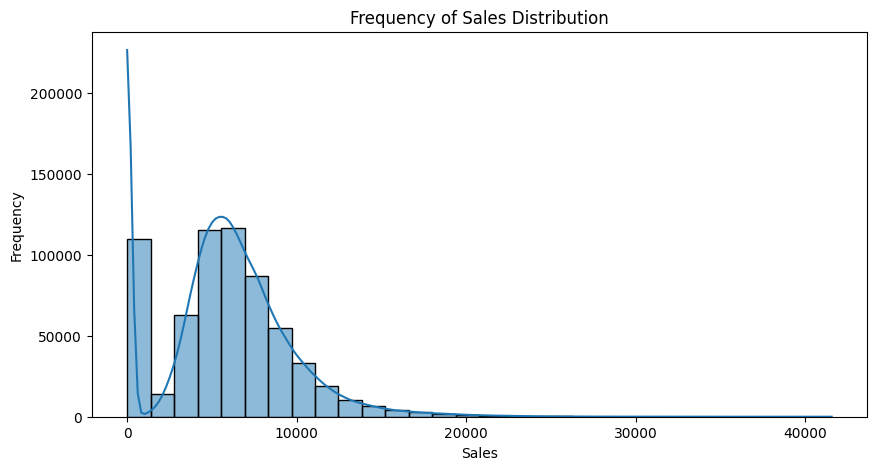

In [ ]:
# Distribution of sales
plt.figure(figsize=(10,5))
sns.histplot(sales_data['sales'], kde=True, bins=30)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Frequency of Sales Distribution')
plt.show()

In [ ]:
# Check binary value columns distributions
for col in sales_data.columns:
    unique_values = sales_data[col].unique()
    if len(unique_values) == 2:
        print(col)

open
promotion
school_holiday


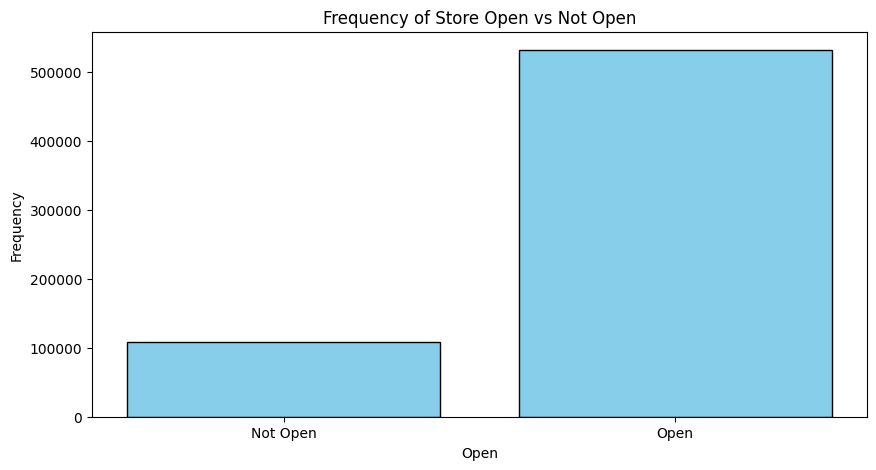

In [ ]:
# 'Open' column
open_counts = sales_data['open'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(open_counts.index, open_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Open')
plt.xticks([0,1], ['Not Open', 'Open'])
plt.ylabel('Frequency')
plt.title('Frequency of Store Open vs Not Open')
plt.show()

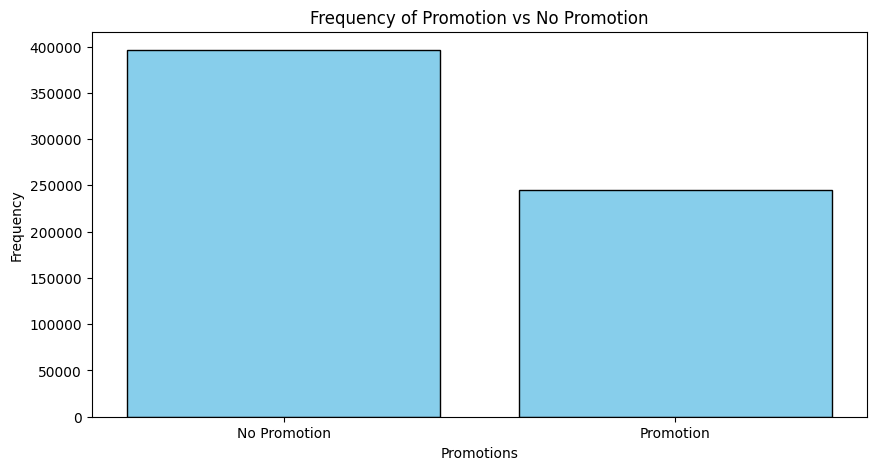

In [ ]:
# 'Promotion' column
promotion_counts = sales_data['promotion'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(promotion_counts.index, promotion_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Promotions')
plt.xticks([0,1], ['No Promotion', 'Promotion'])
plt.ylabel('Frequency')
plt.title('Frequency of Promotion vs No Promotion')
plt.show()

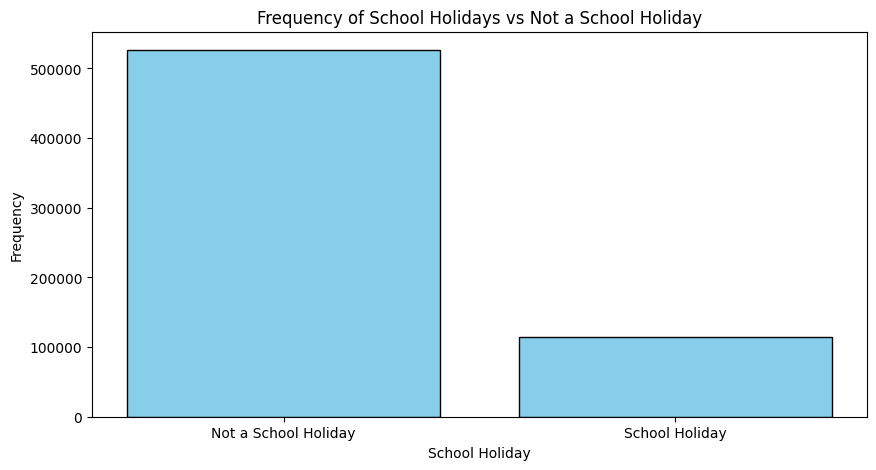

In [ ]:
# 'School Holiday column'
school_holiday_counts = sales_data['school_holiday'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(school_holiday_counts.index, school_holiday_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('School Holiday')
plt.xticks([0,1], ['Not a School Holiday', 'School Holiday'])
plt.ylabel('Frequency')
plt.title('Frequency of School Holidays vs Not a School Holiday')
plt.show()

In [ ]:
# Perform analysis on multicategorical columns

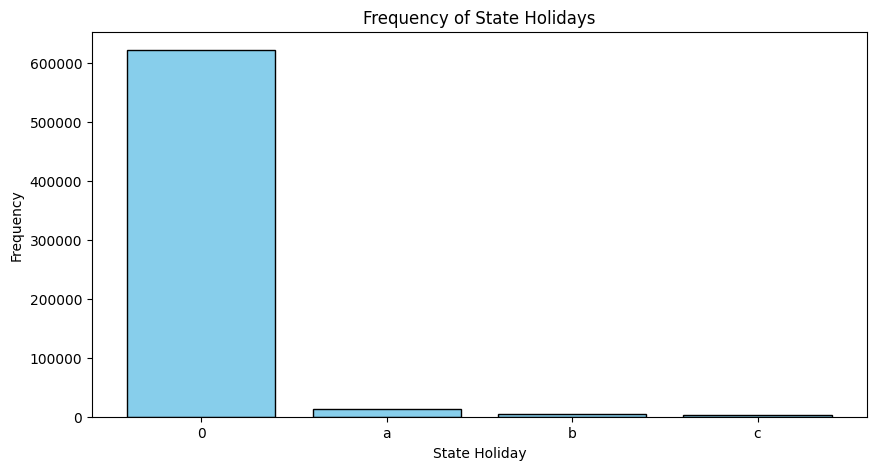

In [ ]:
# 'State Holiday column'
state_holiday_count = sales_data['state_holiday'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(state_holiday_count.index, state_holiday_count.values, color='skyblue', edgecolor='black')
plt.xlabel('State Holiday')
plt.ylabel('Frequency')
plt.title('Frequency of State Holidays')
plt.show()

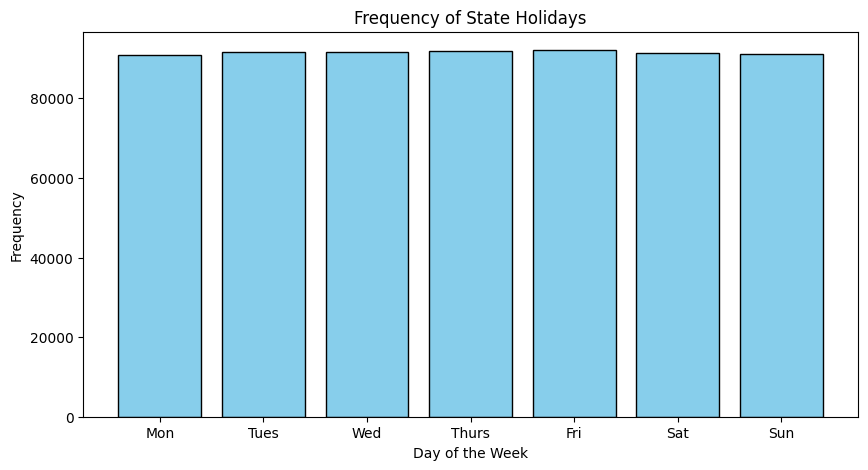

In [ ]:
# 'Day of the week column'
week_days_count = sales_data['day_of_week'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(week_days_count.index, week_days_count.values, color='skyblue', edgecolor='black')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks([1,2,3,4,5,6,7], ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.title('Frequency of State Holidays')
plt.show()

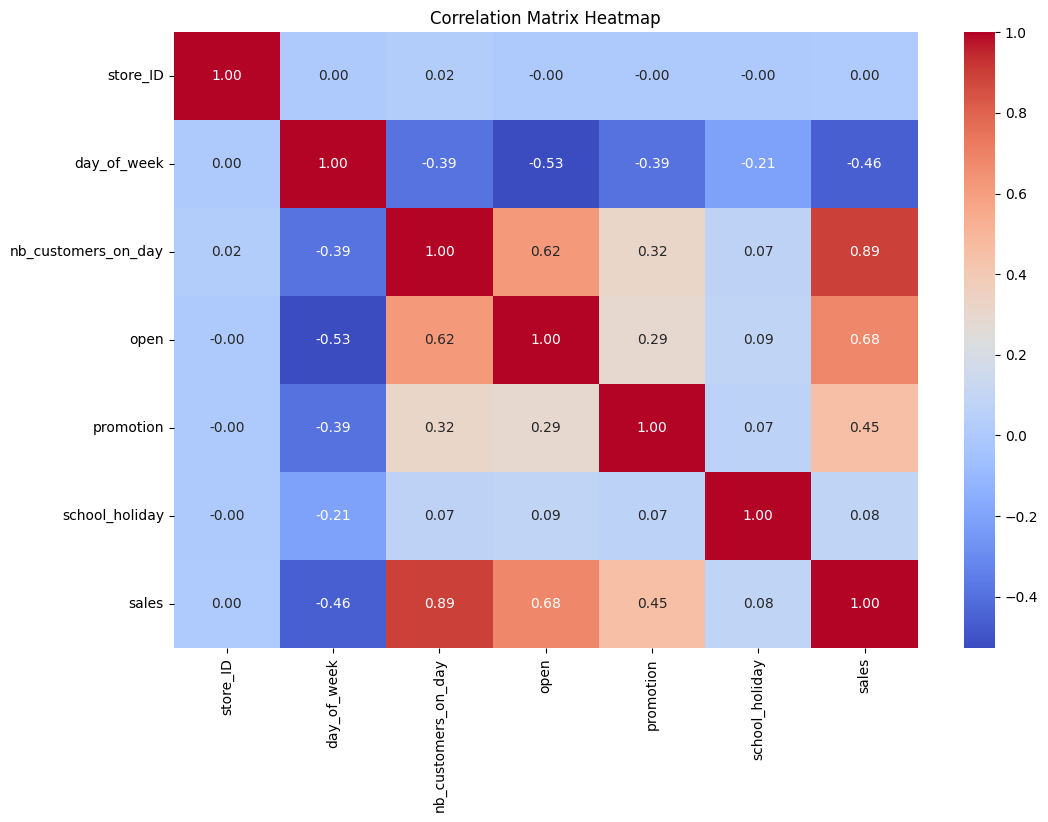

In [ ]:
# Perform correlation matrix
numerical_cols = sales_data.select_dtypes(include=['number'])

correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

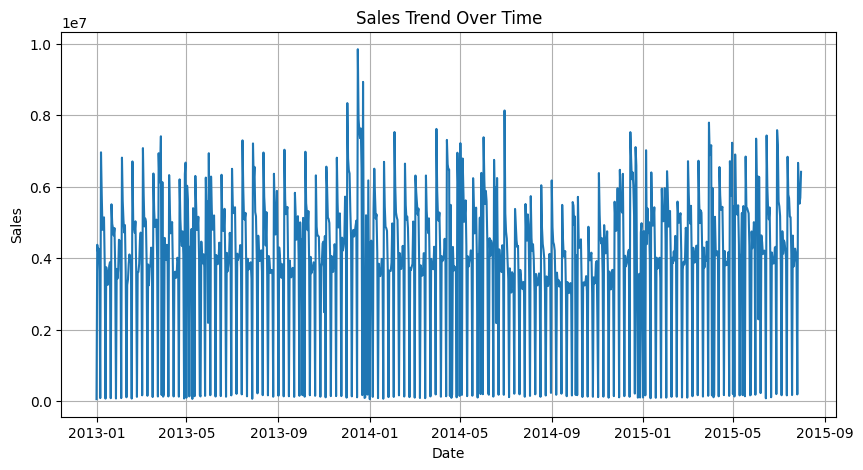

In [ ]:
# Visualize sales over time
grouped_date_sales = sales_data.groupby('date')['sales'].sum().reset_index()


plt.figure(figsize=(10,5))
plt.plot(grouped_date_sales['date'], grouped_date_sales['sales'], label='Total Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time')
plt.grid()
plt.show()

In [ ]:
# Extract date features
sales_data['year'] = sales_data['date'].dt.year
sales_data['month'] = sales_data['date'].dt.month
sales_data['day'] = sales_data['date'].dt.day
sales_data['week of year'] = sales_data['date'].dt.isocalendar().week

In [ ]:
sales_data[['year', 'month', 'day', 'week of year']].head()

,year,month,day,week of year
0,2013,4,18,16
1,2015,4,11,15
2,2013,8,29,35
3,2013,5,28,22
4,2013,10,10,41


In [ ]:
# Discard variables that might cause multicollinearity
sales_data = sales_data.drop(['store_ID', 'school_holiday', 'state_holiday'], axis=1)

In [ ]:
sales_data.head()

,day_of_week,date,nb_customers_on_day,open,promotion,sales,year,month,day,week of year
0,4,2013-04-18,517,1,0,4422,2013,4,18,16
1,6,2015-04-11,694,1,0,8297,2015,4,11,15
2,4,2013-08-29,970,1,1,9729,2013,8,29,35
3,2,2013-05-28,473,1,1,6513,2013,5,28,22
4,4,2013-10-10,1068,1,1,10882,2013,10,10,41


In [ ]:
# Encode categorical variables that will be used for the model

In [ ]:
# Scale data

In [ ]:
# Manually split data into train and test
split_date = '2015-07-01'

train_data = sales_data[sales_data['date'] < split_date ]
test_data = sales_data[sales_data['date'] >= split_date]

In [ ]:
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (619033, 10)
Test data shape: (21807, 10)


In [ ]:
# Train and test data for X and y
X_train = train_data.drop(['sales', 'date'], axis=1)
y_train = train_data['sales']

X_test = test_data.drop(['sales', 'date'], axis=1)
y_test = test_data['sales']

In [ ]:
# Drop previous date column after extraction
sales_data = sales_data.drop('date', axis=1)